In [ ]:
import xarray as xr
from datatree import DataTree
import matplotlib.pyplot as plt
import os
import valenspy as vp
from valenspy._utilities import load_yml
from valenspy.processing.select import select_point, get_shapefile_mask
from valenspy.diagnostic.functions import mean_bias, mean_absolute_error, root_mean_square_error, spearman_correlation, perkins_skill_score, time_series_spatial_mean, calc_metrics_dt, calc_metrics_da,_add_ranks_metrics, root_mean_square_error
from valenspy.diagnostic.visualizations import plot_time_series, plot_map, plot_metric_ranking
from pathlib import Path
import pandas as pd
import numpy as np
import xoak
from sklearn.neighbors import BallTree as skBallTree
from scipy.stats import pearsonr

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

manager = vp.InputManager(machine=machine)

In [45]:
cclm_dir = "/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/hourly/"
cclm_file = "T_2M_hourl_20190722.nc"
wrf_dir = "/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/fiens/UCL/WRF_output/"
wrf_file = "WRF_run_urban_T2,V10,U10,PSFC,RAINNC,TH2,Q2,ALBEDO_20190720-20190724.nc"

In [46]:
ds = xr.open_mfdataset(wrf_dir + wrf_file, combine='by_coords')
ds = ds.assign_coords({"lat":ds.XLAT})
ds = ds.assign_coords({"lon":ds.XLONG})

In [47]:
da = ds["T2"].sel(XTIME ="2019-07-22T16:00:00")
da.xoak.set_index(['XLAT', 'XLONG'], 'sklearn_geo_balltree')

In [48]:
da

<xarray.DataArray 'T2' (south_north: 252, west_east: 324)> Size: 327kB
dask.array<getitem, shape=(252, 324), dtype=float32, chunksize=(252, 324), chunktype=numpy.ndarray>
Coordinates:
    XTIME    datetime64[ns] 8B 2019-07-22T16:00:00
    XLONG    (south_north, west_east) float32 327kB dask.array<chunksize=(252, 324), meta=np.ndarray>
    XLAT     (south_north, west_east) float32 327kB dask.array<chunksize=(252, 324), meta=np.ndarray>
    lat      (south_north, west_east) float32 327kB dask.array<chunksize=(252, 324), meta=np.ndarray>
    lon      (south_north, west_east) float32 327kB dask.array<chunksize=(252, 324), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east
Attributes:
    units:        K
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    stagger:

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/fiens/conda_envs/wrf_env/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(49.0, 52.0)

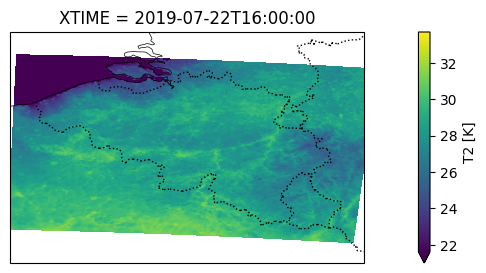

In [50]:
fig, ax = plt.subplots(
    1, 1, figsize=(14, 3), subplot_kw={"projection": ccrs.PlateCarree()}
)
da = da-273.15
da.plot(x = "lon", y = "lat", vmin = 21.6, vmax = 33.7)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, color="k")
ax.set_xlim([2.2, 6.8])
ax.set_ylim([49, 52])

In [51]:
print(da.max().values)
print(da.min().values)

31.890137
18.044159
